In [15]:
# Import dependencies
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [7]:
# Load the data
train_dataset = torchvision.datasets.MNIST(root='./data',train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,  batch_size=100, shuffle=False)

9920512it [00:06, 636081.66it/s]                                               


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz


32768it [00:01, 26574.31it/s]                                                  


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz


1654784it [00:02, 647121.36it/s]                                               


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz


8192it [00:00, 48759.21it/s]                                                   


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [9]:
# Define our neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        output = self.layer1(x)
        output = self.relu(output)
        output = self.layer2(output)
        
        return output

In [10]:
input_size = 28 * 28
hidden_size = 500
output_size = 10
n_epochs = 10
lr = 0.01

model = NeuralNet(input_size, hidden_size, output_size)

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [12]:
print(type(train_loader))

<class 'torch.utils.data.dataloader.DataLoader'>


In [11]:
total_step = len(train_loader)
print(total_step)

600


In [13]:
def show_batch(batch):
    im = torchvision.utils.make_grid(batch)
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

Epoch [1/10], Step [100/600], Loss: 0.1855
Epoch [1/10], Step [200/600], Loss: 0.1866
Epoch [1/10], Step [300/600], Loss: 0.1239
Epoch [1/10], Step [400/600], Loss: 0.2934
Epoch [1/10], Step [500/600], Loss: 0.1318
Epoch [1/10], Step [600/600], Loss: 0.1216
Epoch [2/10], Step [100/600], Loss: 0.0535
Epoch [2/10], Step [200/600], Loss: 0.1821
Epoch [2/10], Step [300/600], Loss: 0.1435
Epoch [2/10], Step [400/600], Loss: 0.1499
Epoch [2/10], Step [500/600], Loss: 0.0577
Epoch [2/10], Step [600/600], Loss: 0.0995
Epoch [3/10], Step [100/600], Loss: 0.0218
Epoch [3/10], Step [200/600], Loss: 0.0083
Epoch [3/10], Step [300/600], Loss: 0.0440
Epoch [3/10], Step [400/600], Loss: 0.0368
Epoch [3/10], Step [500/600], Loss: 0.1842
Epoch [3/10], Step [600/600], Loss: 0.0190
Epoch [4/10], Step [100/600], Loss: 0.0583
Epoch [4/10], Step [200/600], Loss: 0.0703
Epoch [4/10], Step [300/600], Loss: 0.0597
Epoch [4/10], Step [400/600], Loss: 0.0366
Epoch [4/10], Step [500/600], Loss: 0.1811
Epoch [4/10

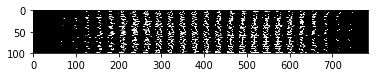

In [16]:
for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28 * 28)
        show_batch(images)
        out = model(images)
        loss = loss_func(out, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, n_epochs, i + 1, total_step, loss.item()))

In [18]:
print(len(test_loader))

100


In [17]:
# Accuracy
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28)
        out = model(images)
        _, predicted = torch.max(out.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 100.0 %
Accuracy of the network on the 10000 test images: 98.5 %
Accuracy of the network on the 10000 test images: 98.0 %
Accuracy of the network on the 10000 test images: 97.25 %
Accuracy of the network on the 10000 test images: 97.4 %
Accuracy of the network on the 10000 test images: 97.5 %
Accuracy of the network on the 10000 test images: 96.85714285714286 %
Accuracy of the network on the 10000 test images: 96.625 %
Accuracy of the network on the 10000 test images: 96.66666666666667 %
Accuracy of the network on the 10000 test images: 96.5 %
Accuracy of the network on the 10000 test images: 96.45454545454545 %
Accuracy of the network on the 10000 test images: 96.41666666666667 %
Accuracy of the network on the 10000 test images: 96.15384615384616 %
Accuracy of the network on the 10000 test images: 96.0 %
Accuracy of the network on the 10000 test images: 96.2 %
Accuracy of the network on the 10000 test images: 96.125 %
Accuracy of the n